In [37]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
import matplotlib.pyplot as plt
print("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:      7.13.0 (need at least 1.0)
Numpy version:        1.17.4 (need at least 1.7.1)
SciPy version:         1.4.1 (need at least 0.12.0)
Pandas version:        1.2.1 (need at least 0.11.0)
Mapltolib version:     3.1.2 (need at least 1.2.1)
Scikit-Learn version: 0.22.2 (need at least 0.13.1)


In [56]:


train_data = pd.read_csv('train.csv')



print(train_data.shape)
print(train_data.describe())

cols = train_data.columns.tolist()
#print(cols)

y = train_data["Class"].values
X = train_data.values[:,1:]

if X.shape[0] != y.shape[0]:
    raise Exception("Sample counts do not align! Try again!")

from sklearn.model_selection import train_test_split

# Split the data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


(1000, 1025)
             Class          D_0          D_1         D_2          D_3  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean      0.762000     0.013000     0.239000     0.04600     0.059000   
std       0.426072     0.113331     0.426686     0.20959     0.235743   
min       0.000000     0.000000     0.000000     0.00000     0.000000   
25%       1.000000     0.000000     0.000000     0.00000     0.000000   
50%       1.000000     0.000000     0.000000     0.00000     0.000000   
75%       1.000000     0.000000     0.000000     0.00000     0.000000   
max       1.000000     1.000000     1.000000     1.00000     1.000000   

               D_4          D_5          D_6          D_7         D_8  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      0.149000     0.080000     0.003000     0.015000     0.04600  ...   
std       0.356267     0.271429     0.054717     0.121613     0.20959  ...   
min       0.00000

In [ ]:
feature_names = list(train_data)[1:4]
#print(feature_names)
X = train_data[feature_names]
y = train_data['Class']

cmap = plt.cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, 
    hist_kwds={'bins':15}, 
    figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('scatter_matrix')

## DecisionTreeClassifier

In [25]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Just get a classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.30      0.42        37
           1       0.86      0.98      0.91       163

    accuracy                           0.85       200
   macro avg       0.80      0.64      0.67       200
weighted avg       0.84      0.85      0.82       200



In [22]:
# my way
test_data = pd.read_csv('test.csv')
x_test = test_data.values[:,1:]
y = test_data["TestId"].values

y_pred = clf.predict(x_test)
y_pred = clf.predict_proba(x_test)[:,1]

d = {'TestId': y, 'PredictedScore': y_pred}
df = pd.DataFrame(data=d)
df.to_csv('submissionDTC.csv',index=False)

In [23]:
# suggested way..
test = pd.read_csv("test.csv", index_col=0)
y_pred = clf.predict(test.values)
proba = clf.predict_proba(test.values)[:, 1]
results = pd.DataFrame(proba, columns=["PredictedScore"])
results.index = test.index.values
results.index.names = ["TestId"]
results.to_csv("submissionDTC.csv") 

## Random Forest

              precision    recall  f1-score   support

           0       0.73      0.51      0.60        37
           1       0.90      0.96      0.93       163

    accuracy                           0.88       200
   macro avg       0.81      0.74      0.76       200
weighted avg       0.87      0.88      0.87       200



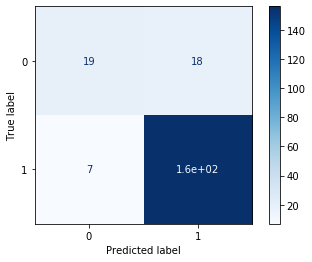

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
rfc = RandomForestClassifier(n_estimators=1000, random_state=100)
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)

# Check the confusion matrix
disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues)

# Just get a classification report.
print(classification_report(y_test, y_test_pred))

In [33]:
test = pd.read_csv("test.csv", index_col=0)
y_pred = rfc.predict(test.values)
proba = rfc.predict_proba(test.values)[:, 1]
results = pd.DataFrame(proba, columns=["PredictedScore"])
results.index = test.index.values
results.index.names = ["TestId"]
results.to_csv("submissionRFC.csv") 

## GridSearch

In [48]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
from sklearn.model_selection import GridSearchCV
# use a full grid over all parameters
param_grid = {'n_estimators': range(20,70,1), "max_depth" : range(20,30,1)}

# run grid search
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.878 (std: 0.015)
Parameters: {'max_depth': 24, 'n_estimators': 21}

Model with rank: 2
Mean validation score: 0.876 (std: 0.014)
Parameters: {'max_depth': 24, 'n_estimators': 20}

Model with rank: 2
Mean validation score: 0.876 (std: 0.016)
Parameters: {'max_depth': 24, 'n_estimators': 23}



In [49]:
test = pd.read_csv("test.csv", index_col=0)
y_pred = grid_search.predict(test.values)
proba = grid_search.predict_proba(test.values)[:, 1]
results = pd.DataFrame(proba, columns=["PredictedScore"])
results.index = test.index.values
results.index.names = ["TestId"]
results.to_csv("submissionGS.csv") 

## Gaussian NB

              precision    recall  f1-score   support

           0       0.27      0.67      0.39        43
           1       0.85      0.51      0.64       157

    accuracy                           0.55       200
   macro avg       0.56      0.59      0.51       200
weighted avg       0.73      0.55      0.58       200



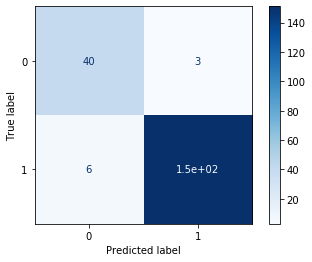

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_test_pred = gnb.predict(X_test)

# Check the confusion matrix
disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues)

# Just get a classification report.
print(classification_report(y_test, y_test_pred))

In [40]:
test = pd.read_csv("test.csv", index_col=0)
y_pred = gnb.predict(test.values)
proba = gnb.predict_proba(test.values)[:, 1]
results = pd.DataFrame(proba, columns=["PredictedScore"])
results.index = test.index.values
results.index.names = ["TestId"]
results.to_csv("submissionGNB.csv") 

## SVC

              precision    recall  f1-score   support

           0       0.76      0.60      0.68        43
           1       0.90      0.95      0.92       157

    accuracy                           0.88       200
   macro avg       0.83      0.78      0.80       200
weighted avg       0.87      0.88      0.87       200



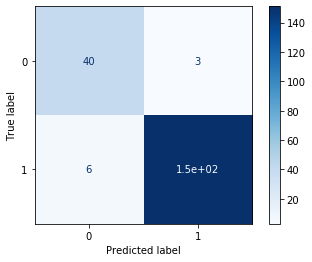

In [50]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

y_test_pred = svm.predict(X_test)

# Check the confusion matrix
disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues)

# Just get a classification report.
print(classification_report(y_test, y_test_pred))

In [51]:
test = pd.read_csv("test.csv", index_col=0)
y_pred = svm.predict(test.values)
#proba = svm.predict_proba(test.values)[:, 1]
results = pd.DataFrame(y_pred, columns=["PredictedScore"])
results.index = test.index.values
results.index.names = ["TestId"]
results.to_csv("submissionSVC.csv") 

## KNN

              precision    recall  f1-score   support

           0       0.80      0.47      0.59        43
           1       0.87      0.97      0.92       157

    accuracy                           0.86       200
   macro avg       0.83      0.72      0.75       200
weighted avg       0.85      0.86      0.85       200



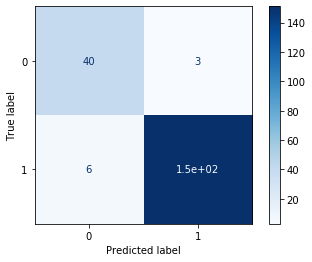

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

# Check the confusion matrix
disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues)

# Just get a classification report.
print(classification_report(y_test, y_test_pred))

In [54]:
test = pd.read_csv("test.csv", index_col=0)
y_pred = knn.predict(test.values)
proba = knn.predict_proba(test.values)[:, 1]
results = pd.DataFrame(proba, columns=["PredictedScore"])
results.index = test.index.values
results.index.names = ["TestId"]
results.to_csv("submissionKNN.csv") 